# Objective:
Leverage ARIMA and Exponential Smoothing techniques to forecast future exchange rates based on historical data provided in the exchange_rate.csv dataset. 


# Dataset:
The dataset contains historical exchange rate with each column representing a different currency rate over time. The first column indicates the date, and second column represent exchange rates USD to Australian Dollar.


In [64]:
# Import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.stats.diagnostic import acorr_ljungbox

# Task

## Part 1: Data Preparation and Exploration
1.	Data Loading: Load the exchange_rate.csv dataset and parse the date column appropriately.
2.	Initial Exploration: Plot the time series for currency to understand their trends, seasonality, and any anomalies.
3.	Data Preprocessing: Handle any missing values or anomalies identified during the exploration phase.


In [53]:
df = pd.read_csv(r"F:\Drive\ExcelR\Assignments\Timeseries\Timeseries\exchange_rate.csv", parse_dates=['date'], index_col='date')
df.head()

,Ex_rate
date,
01-01-1990 00:00,0.7855
02-01-1990 00:00,0.7818
03-01-1990 00:00,0.7867
04-01-1990 00:00,0.7860
05-01-1990 00:00,0.7849


In [54]:
df.isnull().sum()

Ex_rate    0
dtype: int64

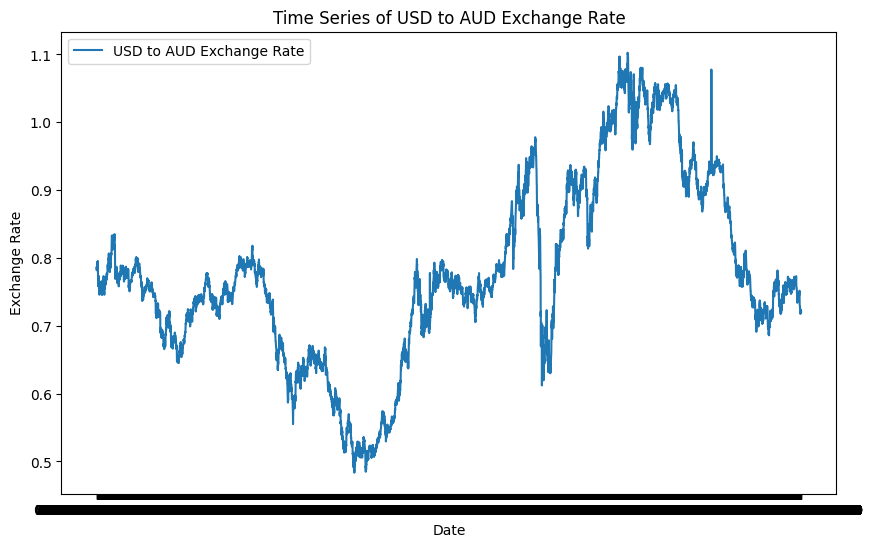

In [55]:
# Plot the exchange rate time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Ex_rate'], label='USD to AUD Exchange Rate')
plt.title('Time Series of USD to AUD Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [56]:
# Decompose the time series
decomposition = seasonal_decompose(df['Ex_rate'], model='multiplicative', period=365)

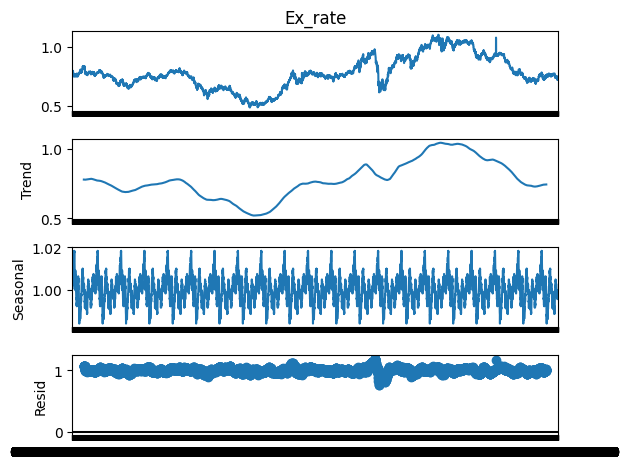

In [57]:
decomposition.plot()
plt.show()

## Part 2: Model Building - ARIMA
1.	Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.
2.	Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.
3.	Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.
4.	Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.


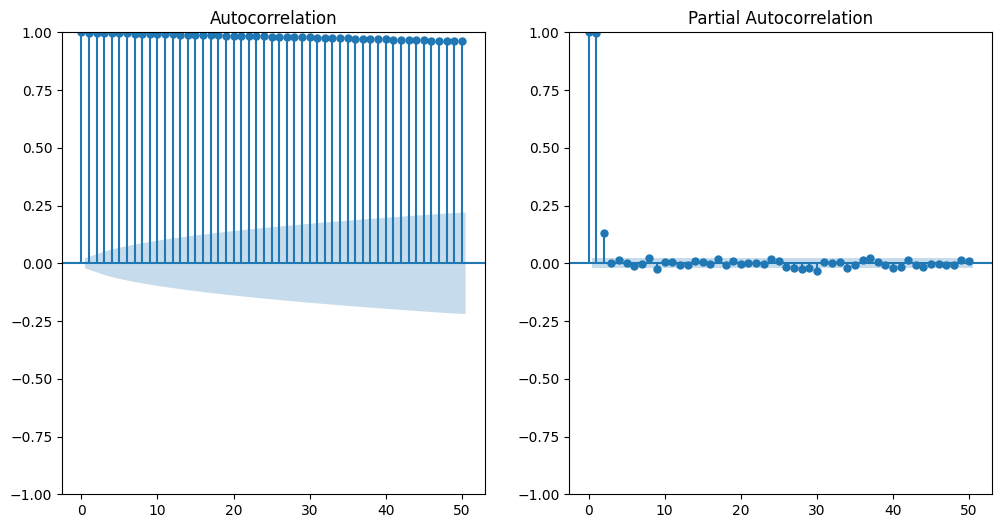

In [58]:
# Plot ACF and PACF
plt.figure(figsize=(12,6))
plt.subplot(121)
plot_acf(df['Ex_rate'], lags=50, ax=plt.gca())
plt.subplot(122)
plot_pacf(df['Ex_rate'], lags=50, ax=plt.gca())
plt.show()

In [59]:
# Normalize the data 
df['Ex_rate'] = (df['Ex_rate'] - df['Ex_rate'].mean()) / df['Ex_rate'].std()

In [60]:
# Fit the ARIMA model
arima_model = ARIMA(df['Ex_rate'], order=(2,1,2))

C:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [61]:
arima_result=arima_model.fit()
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(2, 1, 2)   Log Likelihood               12952.773
Date:                Mon, 16 Sep 2024   AIC                         -25895.547
Time:                        15:06:49   BIC                         -25860.876
Sample:                             0   HQIC                        -25883.648
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1151      0.585     -0.197      0.844      -1.261       1.031
ar.L2          0.1132      0.088      1.293      0.196      -0.058       0.285
ma.L1         -0.0163      0.584     -0.028      0.9

In [65]:
residuals = arima_result.resid

Text(0.5, 1.0, 'Residuals of ARIMA Model')

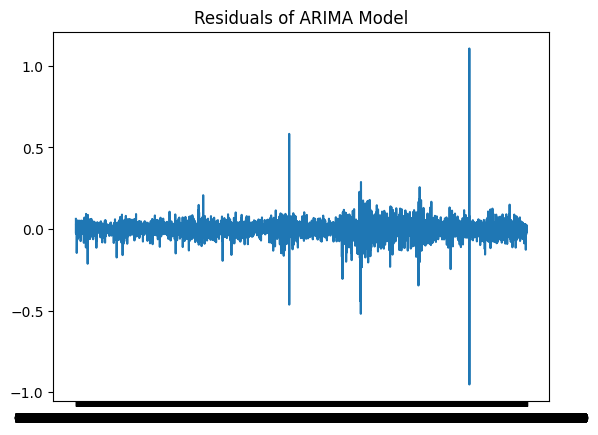

In [66]:
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')

In [67]:
# Perform Ljung-Box test
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)

In [68]:
print(lb_test)

     lb_stat  lb_pvalue
10  9.617455   0.474671


In [70]:
# Forecast future values
forecast = arima_result.forecast(steps=90)

C:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


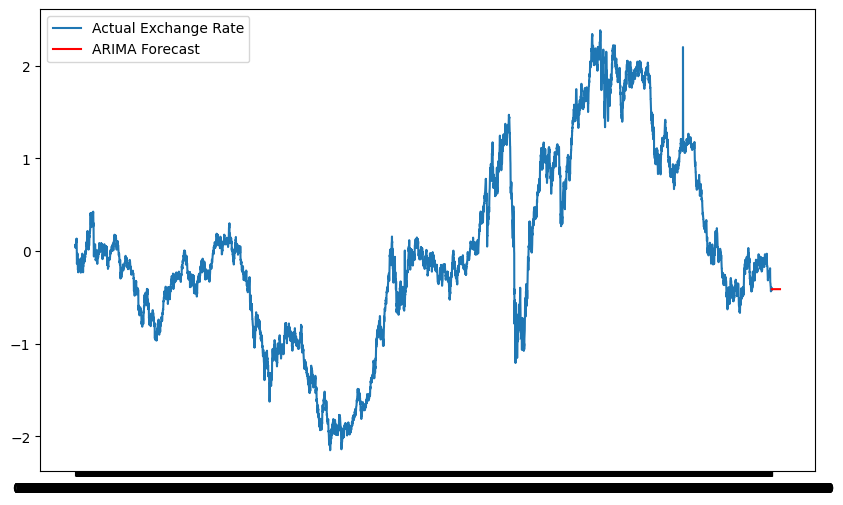

In [71]:
plt.figure(figsize=(10,6))
plt.plot(df['Ex_rate'], label='Actual Exchange Rate')
plt.plot(forecast, label='ARIMA Forecast', color='red')
plt.legend()
plt.show()

## Part 3: Model Building - Exponential Smoothing
1.	Model Selection: Depending on the time series characteristics, choose an appropriate Exponential Smoothing model (Simple, Holt’s Linear, or Holt-Winters).
2.	Parameter Optimization: Use techniques such as grid search or AIC to find the optimal parameters for the smoothing levels and components.
3.	Model Fitting and Forecasting: Fit the chosen Exponential Smoothing model and forecast future values. Compare these forecasts visually with the actual data.


In [40]:
# Fit a Holt-Winters model
exp_model = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal=None, seasonal_periods=12)

C:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [41]:
exp_result = exp_model.fit()

In [42]:
# Forecast using the Exponential Smoothing model
exp_forecast = exp_result.forecast(steps=30)

C:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


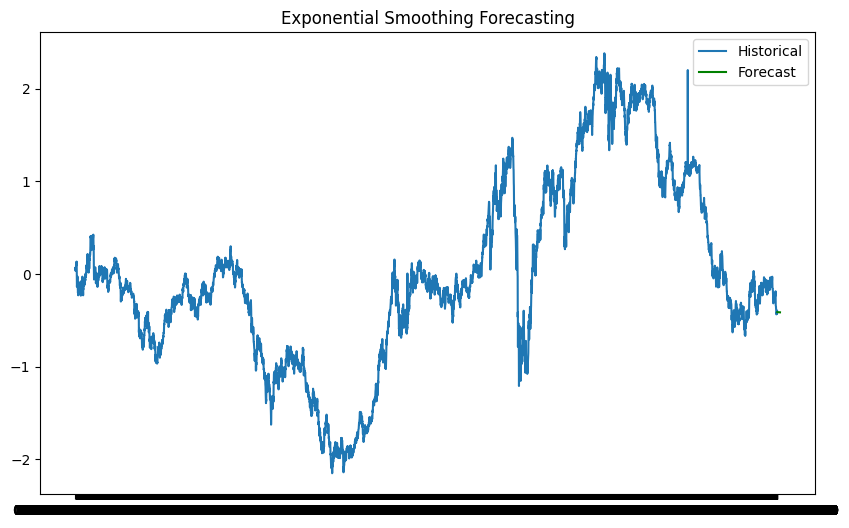

In [43]:
# Plot the forecasted values
plt.figure(figsize=(10,6))
plt.plot(df['Ex_rate'], label='Historical')
plt.plot(exp_forecast, label='Forecast', color='green')
plt.title('Exponential Smoothing Forecasting')
plt.legend()
plt.show()

## Part 4: Evaluation and Comparison
1.	Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.
2.	Model Comparison: Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.
3.	Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset


In [44]:
arima_mae = mean_absolute_error(df['Ex_rate'], arima_result.fittedvalues)

In [79]:
arima_rmse = mean_squared_error(df['Ex_rate'], arima_result.fittedvalues, squared=False)

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [81]:
print(f"ARIMA MAE: {arima_mae}")

ARIMA MAE: 0.027042129798380526


In [80]:
print(f"ARIMA RMSE: {arima_rmse}")

ARIMA RMSE: 0.043888433041687235


In [48]:
exp_mae = mean_absolute_error(df['Ex_rate'], exp_result.fittedvalues)

In [49]:
exp_rmse = mean_squared_error(df['Ex_rate'], exp_result.fittedvalues, squared=False)

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [50]:
print(f"Exponential Smoothing MAE: {exp_mae}")

Exponential Smoothing MAE: 0.02702775090355823


In [51]:
print(f"Exponential Smoothing RMSE: {exp_rmse}")

Exponential Smoothing RMSE: 0.04389225525243192
